## Quick Links:

https://alleninstitute.github.io/abc_atlas_access/notebooks/getting_started.html

https://alleninstitute.github.io/abc_atlas_access/notebooks/merfish_ccf_registration_tutorial.html

see: reference/parcellation.csv

https://pmc.ncbi.nlm.nih.gov/articles/PMC6787288/ (some random study with serial two-photon tomography)

https://alleninstitute.github.io/abc_atlas_access/notebooks/abc_atlas_selection_example.html

https://knowledge.brain-map.org/abcatlas#AQEBSzlKTjIzUDI0S1FDR0s5VTc1QQACSFNZWlBaVzE2NjlVODIxQldZUAADBwFGUzAwRFhWMFQ5UjFYOUZKNFFFAAIAAAFRWTVTOEtNTzVITEpVRjBQMDBLAAIBMDIyIEw1IEVUIENUWCBHbHV0AAABMTVCSzQ3RENJT0YxU0xMVVc5UAACAAABQ0JHQzBVMzBWVjlKUFI2MFRKVQACAAABNzNHVlREWERFR0UyN00yWEpNVAACAAABSTlMTlAwTzFSTjhLNFNOMkdXWQACAVZJU3BtAAABVEZRRkxORVAzVjIyMlk4OEM2NAACAAAEAQAChexuHYN%2B0KIDhAo%2BJYNCd2oEMk5RVElFN1RBTVA4UFFBSE80UAAFga%2BmSoHprA6BoIFHgJLV6AYABwAABQAGAQECRlMwMERYVjBUOVIxWDlGSjRRRQADfgAAAAQAAAhWRk9GWVBGUUdSS1VEUVVaM0ZGAAlMVkRCSkFXOEJJNVlTUzFRVUJHAAoACwFUTE9LV0NMOTVSVTAzRDlQRVRHAAI3M0dWVERYREVHRTI3TTJYSk1UAAMBBAEAAiMwMDAwMDAAA8gBAAUBAQIjMDAwMDAwAAPIAQAAAAIBAA%3D%3D

https://alleninstitute.github.io/abc_atlas_access/descriptions/notebook_subtitle3.html

## Steps Taken:

1. Running the steps in the getting started file: https://alleninstitute.github.io/abc_atlas_access/notebooks/getting_started.html
2. Running the steps in the merfish ccf registration: https://alleninstitute.github.io/abc_atlas_access/notebooks/merfish_ccf_registration_tutorial.html
3. 

In [1]:
# make the below code blacks again if you are running this file the first time :)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from pathlib import Path

from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [3]:
download_base = Path('../../data/abc_atlas')
abc_cache = AbcProjectCache.from_cache_dir(download_base)

abc_cache.current_manifest

'releases/20250531/manifest.json'

In [4]:
abc_cache.list_manifest_file_names

['releases/20230630/manifest.json',
 'releases/20230830/manifest.json',
 'releases/20231215/manifest.json',
 'releases/20240330/manifest.json',
 'releases/20240831/manifest.json',
 'releases/20241115/manifest.json',
 'releases/20241130/manifest.json',
 'releases/20250131/manifest.json',
 'releases/20250331/manifest.json',
 'releases/20250531/manifest.json']

In [5]:
abc_cache.list_directories

['ASAP-PMDBS-10X',
 'ASAP-PMDBS-taxonomy',
 'Allen-CCF-2020',
 'HMBA-10xMultiome-BG',
 'HMBA-10xMultiome-BG-Aligned',
 'HMBA-BG-taxonomy-CCN20250428',
 'MERFISH-C57BL6J-638850',
 'MERFISH-C57BL6J-638850-CCF',
 'MERFISH-C57BL6J-638850-imputed',
 'MERFISH-C57BL6J-638850-sections',
 'SEAAD',
 'SEAAD-taxonomy',
 'WHB-10Xv3',
 'WHB-taxonomy',
 'WMB-10X',
 'WMB-10XMulti',
 'WMB-10Xv2',
 'WMB-10Xv3',
 'WMB-neighborhoods',
 'WMB-taxonomy',
 'Zeng-Aging-Mouse-10Xv3',
 'Zeng-Aging-Mouse-WMB-taxonomy',
 'Zhuang-ABCA-1',
 'Zhuang-ABCA-1-CCF',
 'Zhuang-ABCA-2',
 'Zhuang-ABCA-2-CCF',
 'Zhuang-ABCA-3',
 'Zhuang-ABCA-3-CCF',
 'Zhuang-ABCA-4',
 'Zhuang-ABCA-4-CCF']

In [6]:
allen_ccf_list = abc_cache.get_directory_data('Allen-CCF-2020')
print("Allen-CCF-2020 data files:\n\t", allen_ccf_list)

Allen-CCF-2020 data files:
	 [PosixPath('/home/vanilla_skies/data/abc_atlas/image_volumes/Allen-CCF-2020/20250331/annotation_10.nii.gz'), PosixPath('/home/vanilla_skies/data/abc_atlas/image_volumes/Allen-CCF-2020/20250331/annotation_25.nii.gz'), PosixPath('/home/vanilla_skies/data/abc_atlas/image_volumes/Allen-CCF-2020/20250331/annotation_boundary_10.nii.gz'), PosixPath('/home/vanilla_skies/data/abc_atlas/image_volumes/Allen-CCF-2020/20250331/annotation_boundary_25.nii.gz'), PosixPath('/home/vanilla_skies/data/abc_atlas/image_volumes/Allen-CCF-2020/20250331/average_template_10.nii.gz'), PosixPath('/home/vanilla_skies/data/abc_atlas/image_volumes/Allen-CCF-2020/20250331/average_template_25.nii.gz')]


In [7]:
cell = abc_cache.get_metadata_dataframe(directory='MERFISH-C57BL6J-638850', file_name='cell_metadata_with_cluster_annotation')
cell.rename(columns={'x': 'x_section',
                     'y': 'y_section',
                     'z': 'z_section'},
            inplace=True)
cell.set_index('cell_label', inplace=True)
cell.head(5)

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x_section,y_section,z_section,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,NaN,04 DG-IMN Glut,038 DG-PIR Ex IMN,0141 DG-PIR Ex IMN_2,0515 DG-PIR Ex IMN_2,#666666,#16f2f2,#3D53CC,#CC7A3D,#73FFBF
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63


In [8]:
reconstructed_coords = abc_cache.get_metadata_dataframe(
    directory='MERFISH-C57BL6J-638850-CCF',
    file_name='reconstructed_coordinates',
    dtype={"cell_label": str}
)
reconstructed_coords.rename(columns={'x': 'x_reconstructed',
                                     'y': 'y_reconstructed',
                                     'z': 'z_reconstructed'},
                            inplace=True)
reconstructed_coords.set_index('cell_label', inplace=True)
reconstructed_coords.head(5)

,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index
cell_label,,,,
1019171911101460569,7.143894,7.890964,0.8,945
1019171911101550321,4.188673,7.962972,0.8,945
1019171911100841066,6.859447,5.908534,0.8,893
1019171911101400425,3.952014,7.564086,0.8,842
1019171911101380264,2.803546,7.221688,0.8,0


In [9]:
cell_joined = cell.join(reconstructed_coords, how='inner')
cell_joined.head(5)

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x_section,y_section,z_section,...,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,...,0515 DG-PIR Ex IMN_2,#666666,#16f2f2,#3D53CC,#CC7A3D,#73FFBF,7.255606,4.007680,6.6,1160
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,...,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63,5.036436,7.264429,4.2,564
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,...,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63,5.784270,8.007646,4.0,761
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,...,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63,3.161528,5.719814,2.4,718
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,...,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63,5.618763,7.847877,4.4,761


In [10]:
ccf_coords = abc_cache.get_metadata_dataframe(
    directory='MERFISH-C57BL6J-638850-CCF',
    file_name='ccf_coordinates',
    dtype={"cell_label": str}
)
ccf_coords.rename(columns={'x': 'x_ccf',
                           'y': 'y_ccf',
                           'z': 'z_ccf'},
                  inplace=True)
ccf_coords.drop(['parcellation_index'], axis=1, inplace=True)
ccf_coords.set_index('cell_label', inplace=True)
ccf_coords.head(5)

ccf_coordinates.csv: 100%|██████████████████████████████████████████████████████████| 296M/296M [02:31<00:00, 1.95MMB/s]


,x_ccf,y_ccf,z_ccf
cell_label,,,
1019171911101460569,12.282330,6.987808,7.385773
1019171911101550321,12.192214,7.002155,4.366855
1019171911100841066,12.500341,4.750392,7.074634
1019171911101400425,12.231647,6.544816,4.128568
1019171911101380264,12.238502,6.135836,2.948194


In [11]:
cell_joined = cell_joined.join(ccf_coords, how='inner')
cell_joined.head(5)

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x_section,y_section,z_section,...,subclass_color,supertype_color,cluster_color,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index,x_ccf,y_ccf,z_ccf
cell_label,,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,...,#3D53CC,#CC7A3D,#73FFBF,7.255606,4.007680,6.6,1160,7.495417,2.445872,7.455066
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,...,#9B7ACC,#990041,#663D63,5.036436,7.264429,4.2,564,9.227966,6.133693,5.225024
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,...,#9B7ACC,#990041,#663D63,5.784270,8.007646,4.0,761,9.344912,6.989939,6.002664
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,...,#9B7ACC,#990041,#663D63,3.161528,5.719814,2.4,718,10.977068,4.398568,3.305223
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,...,#9B7ACC,#990041,#663D63,5.618763,7.847877,4.4,761,8.997138,6.798329,5.827197


In [14]:
def plot_section(xx=None, yy=None, cc=None, val=None, pcmap=None, 
                 overlay=None, extent=None, bcmap=plt.cm.Greys_r, alpha=1.0,
                 fig_width = 6, fig_height = 6):
    
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)

    if xx is not None and yy is not None and pcmap is not None:
        plt.scatter(xx, yy, s=0.5, c=val, marker='.', cmap=pcmap)
    elif xx is not None and yy is not None and cc is not None:
        plt.scatter(xx, yy, s=0.5, color=cc, marker='.', zorder=1)   
        
    if overlay is not None and extent is not None and bcmap is not None:
        plt.imshow(overlay, cmap=bcmap, extent=extent, alpha=alpha, zorder=2)
        
    ax.set_ylim(11, 0)
    ax.set_xlim(0, 11)
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

104572


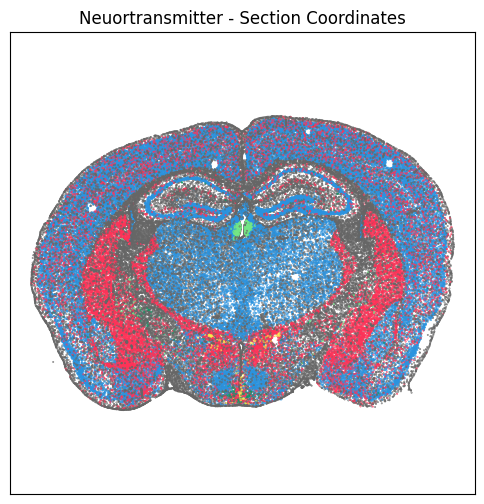

In [16]:
brain_section = 'C57BL6J-638850.40'
pred = (cell_joined['brain_section_label'] == brain_section)
section = cell_joined[pred]
print(len(section))

fig, ax = plot_section(xx=section['x_section'],
                       yy=section['y_section'], 
                       cc=section['neurotransmitter_color'])
res = ax.set_title("Neuortransmitter - Section Coordinates")
plt.show()

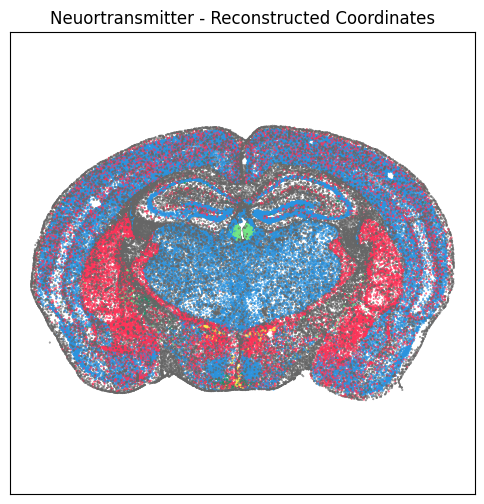

In [17]:
fig, ax = plot_section(xx=section['x_reconstructed'],
                       yy=section['y_reconstructed'], 
                       cc=section['neurotransmitter_color'])
res = ax.set_title("Neuortransmitter - Reconstructed Coordinates")
plt.show()

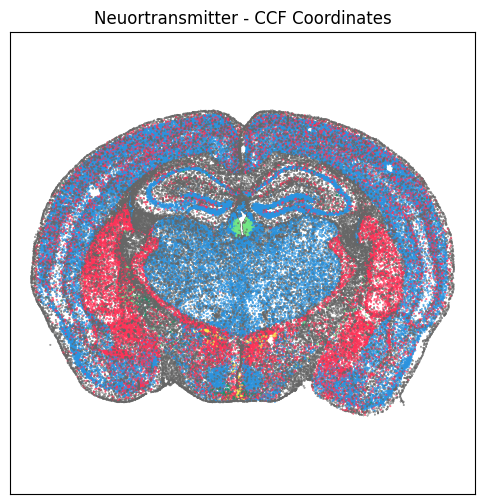

In [18]:
fig, ax = plot_section(xx=section['z_ccf'],
                       yy=section['y_ccf'], 
                       cc=section['neurotransmitter_color'])
res = ax.set_title("Neuortransmitter - CCF Coordinates")
plt.show()

In [19]:
section["neurotransmitter_color"]

cell_label
1019171907201490388    #666666
1019171907101490466    #666666
1019171907202030406    #2B93DF
1019171907102030864    #666666
1019171907201500210    #666666
                        ...   
1019171907103110107    #666666
1019171907102100239    #666666
1019171907200750373    #666666
1019171907102980627    #666666
1019171907102980618    #666666
Name: neurotransmitter_color, Length: 104572, dtype: object